# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, confusion_matrix 
from sklearn.model_selection import cross_val_score
import seaborn as sns

# Loading Datasets & Preprocessing

In [2]:
data = np.loadtxt('tictac_final.txt')
data

array([[ 1.,  1.,  1., ..., -1., -1.,  1.],
       [ 1.,  1.,  1., ...,  1., -1.,  1.],
       [ 1.,  1.,  1., ..., -1.,  1.,  1.],
       ...,
       [-1.,  1., -1., ..., -1.,  1., -1.],
       [-1.,  1., -1., ..., -1.,  1., -1.],
       [-1., -1.,  1., ...,  1.,  1., -1.]])

In [3]:
df = pd.DataFrame(data, columns = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','y'])
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,y
0,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
1,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0
2,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,0.0,0.0,1.0
4,1.0,1.0,1.0,1.0,-1.0,-1.0,0.0,-1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
953,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0
954,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0
955,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0
956,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0


In [4]:
#Label encoding
le = preprocessing.LabelEncoder()

#Transforming df
col = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','y']
for i in range(len(col)):
    df[col[i]]=le.fit_transform(df[col[i]])
    
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,y
0,2,2,2,2,0,0,2,0,0,1
1,2,2,2,2,0,0,0,2,0,1
2,2,2,2,2,0,0,0,0,2,1
3,2,2,2,2,0,0,0,1,1,1
4,2,2,2,2,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
953,0,2,2,2,0,0,0,2,2,0
954,0,2,0,2,2,0,2,0,2,0
955,0,2,0,2,0,2,2,0,2,0
956,0,2,0,0,2,2,2,0,2,0


player X is 1 & player O is 0

In [5]:
#X and Y
X = df.drop('y', axis = 1)
y = df['y']

In [6]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
X_train.shape

(766, 9)

In [8]:
X_test.shape

(192, 9)

# Linear SVM

In [9]:
lin_svm = make_pipeline(LinearSVC(random_state=0, tol=1e-5))
lin_svm.fit(X_train, y_train)

Pipeline(steps=[('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [10]:
print(lin_svm.named_steps['linearsvc'].coef_)

[[1.45322486 1.42163141 1.45277703 1.41459959 1.51854743 1.40516618
  1.46675633 1.39405856 1.47179588]]


In [11]:
print(lin_svm.named_steps['linearsvc'].intercept_)

[-13.65122722]


In [12]:
y_pred_svm=lin_svm.predict(X_test)
y_pred_svm

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [13]:
accuracy_score(y_test,y_pred_svm)

0.96875

In [14]:
recall_score(y_test,y_pred_svm,average='macro')

0.9552238805970149

In [15]:
precision_score(y_test,y_pred_svm,average='macro')

0.9770992366412214

In [16]:
f1_score(y_test,y_pred_svm,average='macro')

0.96484375

<AxesSubplot:>

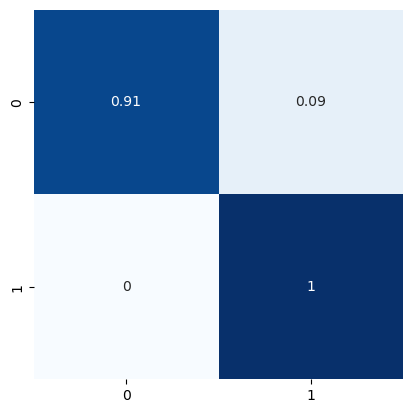

In [17]:
conf_mat = confusion_matrix(y_test, y_pred_svm,normalize='true')
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', cbar=False)

In [18]:
accuracies_svm = cross_val_score(estimator = lin_svm, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_svm.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_svm.std()*100))

Accuracy: 98.70 %
Standard Deviation: 1.01 %


# KNN

In [19]:
ng = make_pipeline(KNeighborsClassifier(n_neighbors=5))
ng.fit(X_train, y_train)

y_pred_ng=ng.predict(X_test)
y_pred_ng

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0], dtype=int64)

In [20]:
accuracy_score(y_test,y_pred_ng)

0.9947916666666666

In [21]:
recall_score(y_test,y_pred_ng,average='macro')

0.9925373134328358

In [22]:
precision_score(y_test,y_pred_ng,average='macro')

0.996031746031746

In [23]:
f1_score(y_test,y_pred_ng,average='macro')

0.9942485696312494

<AxesSubplot:>

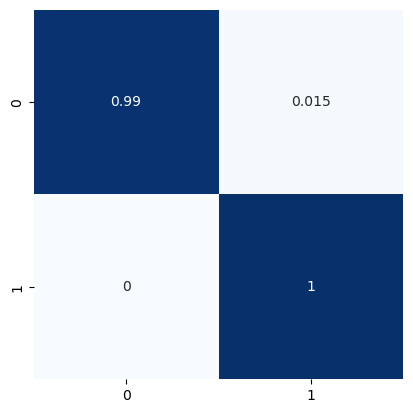

In [24]:
conf_mat = confusion_matrix(y_test, y_pred_ng, normalize='true')
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', cbar=False)

In [25]:
accuracies_ng = cross_val_score(estimator = ng, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies_ng.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_ng.std()*100))

Accuracy: 99.74 %
Standard Deviation: 0.53 %


# Multi-layer Perceptron

In [26]:
mlp = make_pipeline(MLPClassifier(hidden_layer_sizes=(200,150,100,100,50), max_iter=200, tol=0.5))
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)
y_pred_mlp

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [27]:
accuracy_score(y_test,y_pred_mlp)

0.9583333333333334

In [28]:
recall_score(y_test,y_pred_mlp,average='macro')

0.9437611940298507

In [29]:
precision_score(y_test,y_pred_mlp,average='macro')

0.9650857214366162

In [30]:
f1_score(y_test,y_pred_mlp,average='macro')

0.953125

<AxesSubplot:>

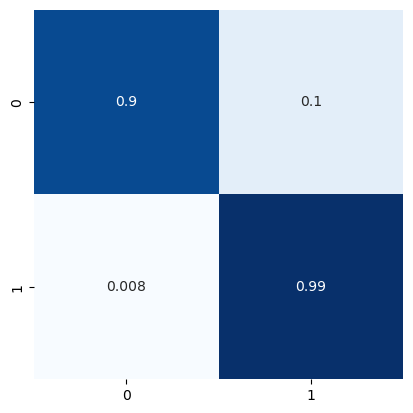

In [31]:
conf_mat = confusion_matrix(y_test, y_pred_mlp, normalize='true')
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', cbar=False)

In [32]:
accuracies_mlp = cross_val_score(estimator = mlp, X = X_train, y = y_train, cv = 20)
print("Accuracy: {:.2f} %".format(accuracies_mlp.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_mlp.std()*100))

Accuracy: 94.37 %
Standard Deviation: 5.65 %
